## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx


## Get Data

In [ ]:
episodes_df = pd.read_csv("data/simpsons_episodes.csv", index_col="id").sort_index()
text_df = pd.read_csv("data/simpsons_script_lines.csv", error_bad_lines=False).sort_index()

## Get main characters

In [4]:
sorted_text_df = text_df.sort_values("id")#["raw_character_text"]#.to_numpy()

main_characters = list(text_df["raw_character_text"].value_counts().index[:20])

character_dict = {character:i for i, character in enumerate(main_characters)}
id_dict = {i:character for i, character in enumerate(main_characters)}

main_characters

['Homer Simpson',
 'Marge Simpson',
 'Bart Simpson',
 'Lisa Simpson',
 'C. Montgomery Burns',
 'Moe Szyslak',
 'Seymour Skinner',
 'Ned Flanders',
 'Grampa Simpson',
 'Milhouse Van Houten',
 'Chief Wiggum',
 'Krusty the Clown',
 'Nelson Muntz',
 'Lenny Leonard',
 'Apu Nahasapeemapetilon',
 'Waylon Smithers',
 'Kent Brockman',
 'Carl Carlson',
 'Edna Krabappel-Flanders',
 'Dr. Julius Hibbert']

## Make Interaction Graph
"Interaction" occur if two characters speak after one another

In [5]:
G = nx.Graph()

raw_location_text_before = ""
episode_id_before = -1
for i in range(len(sorted_text_df)):

    # is something spoken?
    if sorted_text_df["speaking_line"].iloc[i] == False or sorted_text_df["speaking_line"].iloc[i] == "false":
        # print(sorted_text_df["speaking_line"].iloc[i])
        continue

    # check if episode and location of text is the same
    if raw_location_text_before != sorted_text_df["raw_location_text"].iloc[i] or sorted_text_df["episode_id"].iloc[i] != episode_id_before:
        raw_location_text_before = sorted_text_df.iloc[i]["raw_location_text"]
        episode_id_before = sorted_text_df.iloc[i]["episode_id"]
        continue

    raw_location_text_before = sorted_text_df.iloc[i]["raw_location_text"]
    episode_id_before = sorted_text_df.iloc[i]["episode_id"]

    # get characters
    c1 = sorted_text_df["raw_character_text"].iloc[i]
    c2 = sorted_text_df["raw_character_text"].iloc[i+1]

    # if type(first) == float or type(second) == float:
    if c1 not in main_characters or c2 not in main_characters:
        continue

    sorted_characters = sorted([c1, c2])
    try:
        G.edges[sorted_characters]["weight"] += 1
    except KeyError:
        G.add_edge(sorted_characters[0], sorted_characters[1], weight=1)

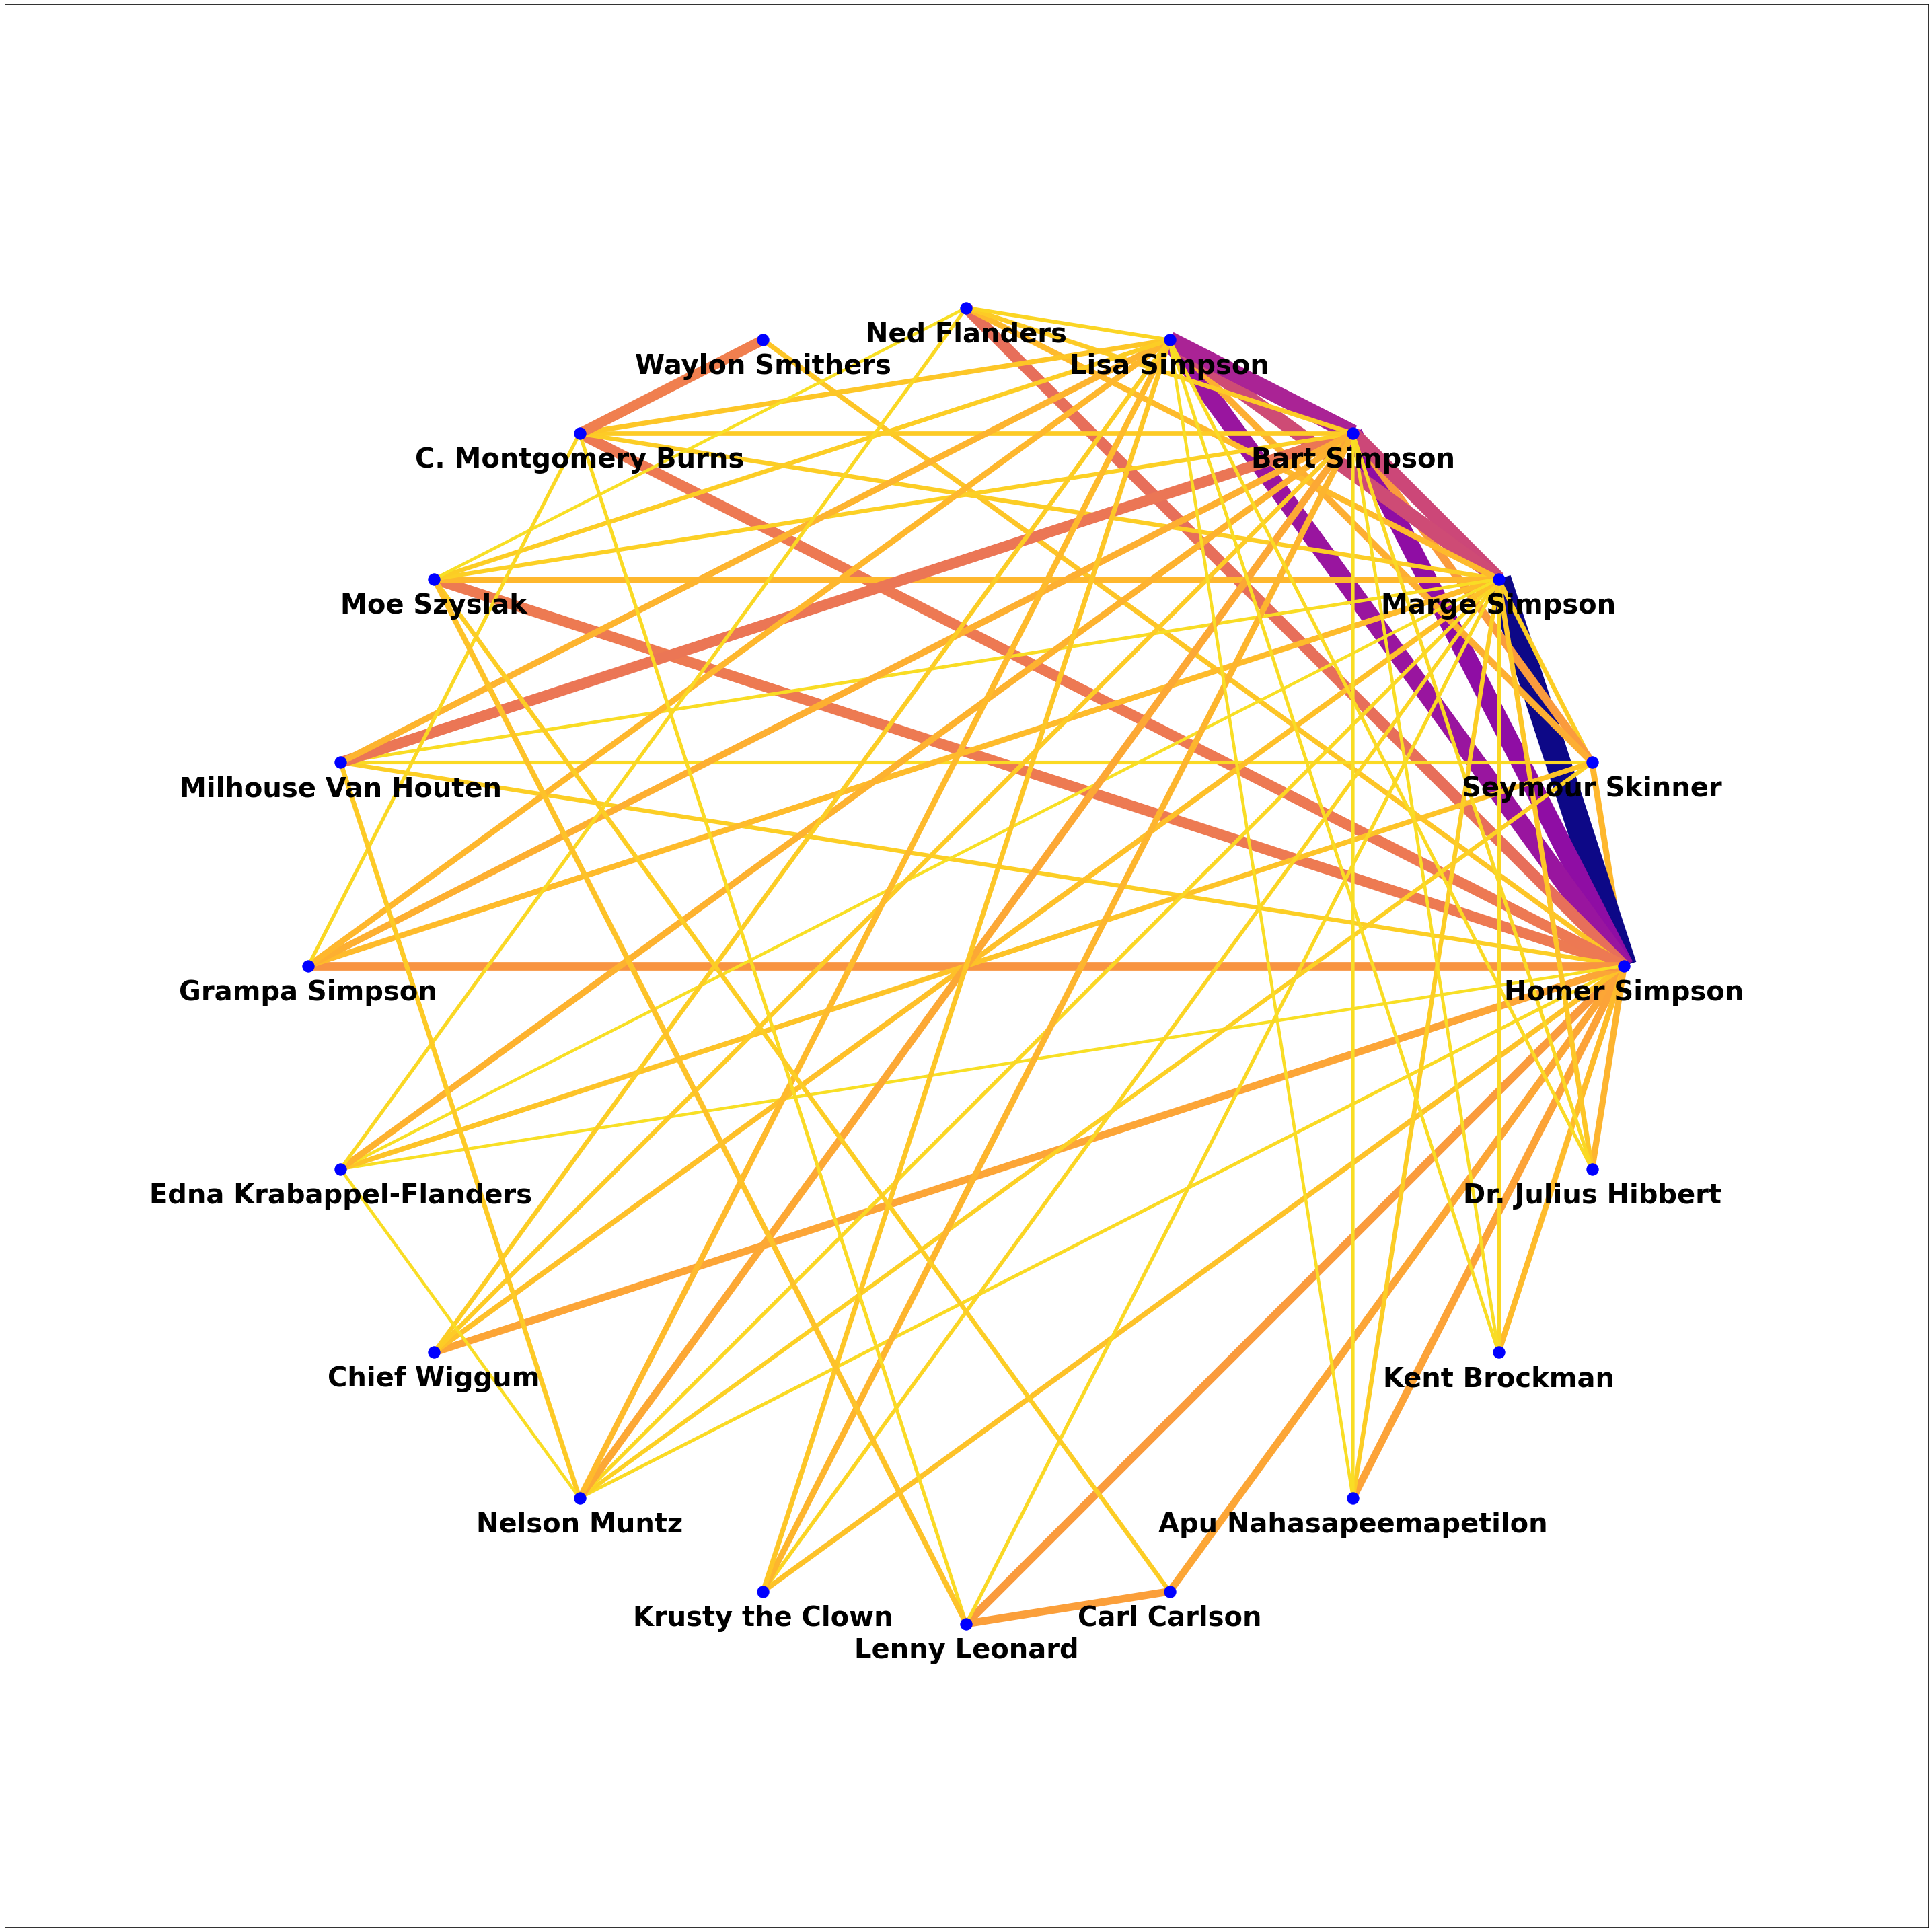

In [6]:
plt.figure(figsize=(40,40))

pos = nx.circular_layout(G) 

edges = G.edges()
colors = [G[u][v]['weight']**0.5 for u,v in edges]
weights = [G[u][v]['weight']**0.4 if G[u][v]['weight'] > 40 else 0 for u,v in edges]

cmap = matplotlib.cm.get_cmap('plasma_r')
nx.draw_networkx(G, pos, width=weights, edge_color=colors, node_color="blue", edge_cmap=cmap, with_labels=False)

labels_pos = {name:[pos_list[0], pos_list[1]-0.04] for name, pos_list in pos.items()}
nx.draw_networkx_labels(G, labels_pos, font_size=40, font_family="sans-serif", font_color="#000000", font_weight="bold")

ax = plt.gca()
ax.margins(0.25)
plt.axis("equal")
plt.tight_layout()
plt.savefig("simpsons_interaction")